In [34]:
import numpy as np
import matplotlib.pyplot as mplot
import pandas as pd

In [35]:
from tensorflow.keras.datasets import mnist

In [36]:
import tensorflow as tf

In [37]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [38]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [40]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
only_seven = X_train[y_train==7]

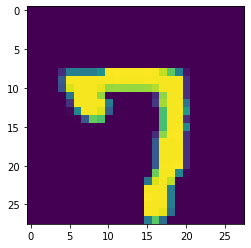

In [66]:
mplot.imshow(only_seven[20])

In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Reshape, Flatten, Input

In [44]:
codings_size = 100
input_layer = Input(shape=(codings_size,))
X = Dense(100, activation='relu', name='gen1')(input_layer)
X = Dense(150, activation='relu', name='gen2')(X)
X = Dense(784, activation='relu', name='gen3')(X)
X = Reshape(target_shape=(28,28), name='gen_reshape')(X)

generator = Model(inputs=input_layer, outputs=X, name='generator')


In [67]:
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
gen1 (Dense)                 (None, 100)               10100     
_________________________________________________________________
gen2 (Dense)                 (None, 150)               15150     
_________________________________________________________________
gen3 (Dense)                 (None, 784)               118384    
_________________________________________________________________
gen_reshape (Reshape)        (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [45]:
input_layer2 = Input(shape=(28,28))
x = Flatten(name='disc_flatten')(input_layer2)
x = Dense(150, activation='relu', name='disc1')(x)
x = Dense(100, activation='relu', name='disc2')(x)
x = Dense(1, activation='sigmoid', name='disc3')(x)

discriminator = Model(inputs=input_layer2, outputs=x, name='discriminator')
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
disc_flatten (Flatten)       (None, 784)               0         
_________________________________________________________________
disc1 (Dense)                (None, 150)               117750    
_________________________________________________________________
disc2 (Dense)                (None, 100)               15100     
_________________________________________________________________
disc3 (Dense)                (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________


In [47]:
from tensorflow.keras.models import Sequential

In [48]:
gan = Sequential([generator, discriminator])

In [49]:
discriminator.trainable = False

In [50]:
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [51]:
gan.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator (Model)            (None, 28, 28)            143634    
_________________________________________________________________
discriminator (Model)        (None, 1)                 132951    
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


In [52]:
batch_size = 32

In [53]:
my_data = only_seven

In [54]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [55]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [56]:
epochs = 30

In [57]:
gen, dis = gan.layers

In [58]:
for epoch in range(epochs):
    print(f"Currently on epoch {epoch+1}")
    i = 0
    
    for X_batch in dataset:
        i = i + 1
        if i%50 ==0:
            print(f"\t Currently on batch {i} of {len(my_data)//batch_size}")
    
        #Discriminator Training Phase
        noise = tf.random.normal(shape=[batch_size, codings_size])
        gen_images = generator(noise)
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)
        y1 = tf.constant([[0.0]]*batch_size+ [[1.0]]*batch_size)
        discriminator.trainable= True
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        #Generator Training Phase
        noise = tf.random.normal(shape=[batch_size, codings_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y2)
            

Currently on epoch 1
	 Currently on batch 50 of 195
	 Currently on batch 100 of 195
	 Currently on batch 150 of 195
Currently on epoch 2
	 Currently on batch 50 of 195
	 Currently on batch 100 of 195
	 Currently on batch 150 of 195
Currently on epoch 3
	 Currently on batch 50 of 195
	 Currently on batch 100 of 195
	 Currently on batch 150 of 195
Currently on epoch 4
	 Currently on batch 50 of 195
	 Currently on batch 100 of 195
	 Currently on batch 150 of 195
Currently on epoch 5
	 Currently on batch 50 of 195
	 Currently on batch 100 of 195
	 Currently on batch 150 of 195
Currently on epoch 6
	 Currently on batch 50 of 195
	 Currently on batch 100 of 195
	 Currently on batch 150 of 195
Currently on epoch 7
	 Currently on batch 50 of 195
	 Currently on batch 100 of 195
	 Currently on batch 150 of 195
Currently on epoch 8
	 Currently on batch 50 of 195
	 Currently on batch 100 of 195
	 Currently on batch 150 of 195
Currently on epoch 9
	 Currently on batch 50 of 195
	 Currently on batch

In [59]:
test_set = tf.random.normal(shape=[10,codings_size])
gen_images = generator(test_set)


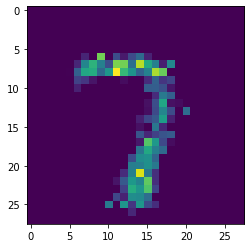

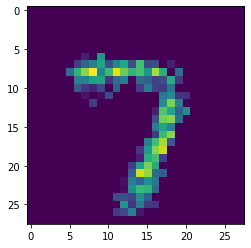

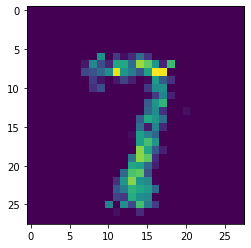

In [77]:
test_img = tf.random.normal(shape=[3,codings_size])
new_img = generator(test_img)
for img in new_img:
    mplot.imshow(img)
    mplot.show()

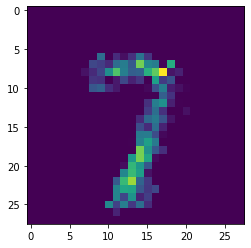

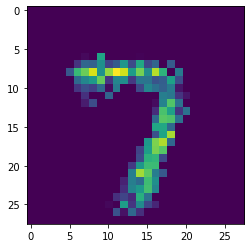

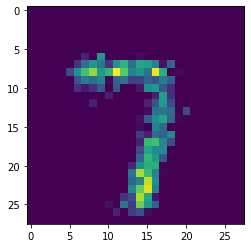

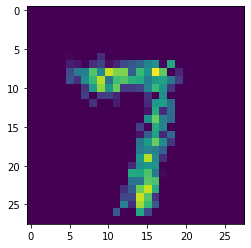

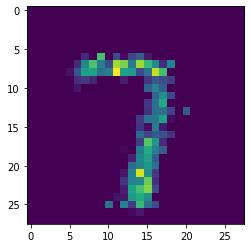

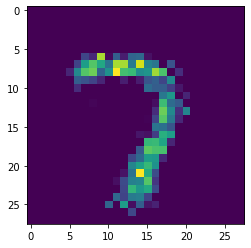

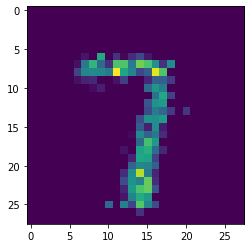

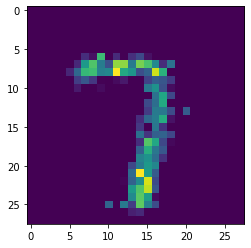

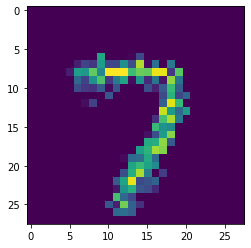

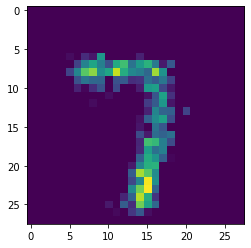

In [61]:
for image in gen_images:
    mplot.imshow(image)
    mplot.show()